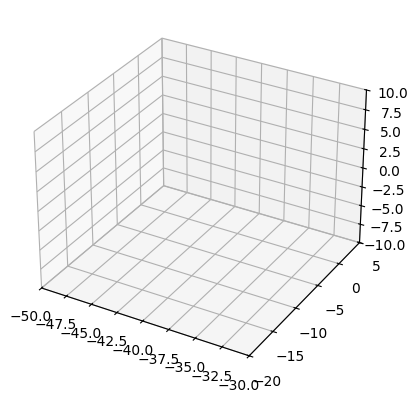

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Circletest
import Point_In_Spheres
import Point_Maker
import Random_Spheres
import Plot_Sphere
import Volume_Of_Spheres
import Calculate_pi
import Size_of_atom
import Walkers_Task_1
import Task_9
import Calculate_the_volume_of_DNA

***Topic 1***
Task 0
We use the plot function to define the box in which we will place our spheres and points

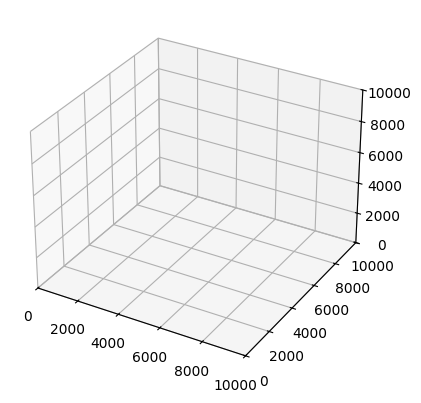

In [2]:
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

plt.show()

Task 1 We created a random point, and placed it inside the box

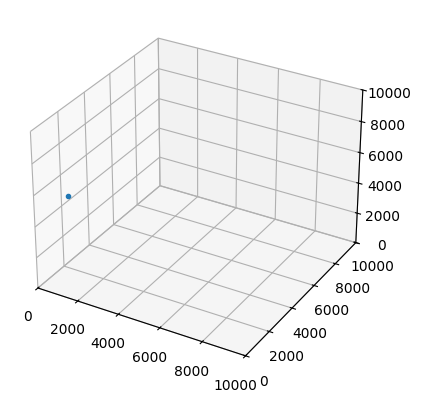

In [3]:
#Function in PointMaker make_points, makes a random point, and then places it
points = 1
point = Point_Maker.make_points(points,0,10000)#Point randomly placed in simulation box
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

ax.plot(point[:,0],point[:,1],point[:,2],'.')
plt.show()


Task 2 In this task we made a function to randomize the size and location of a sphere within the box

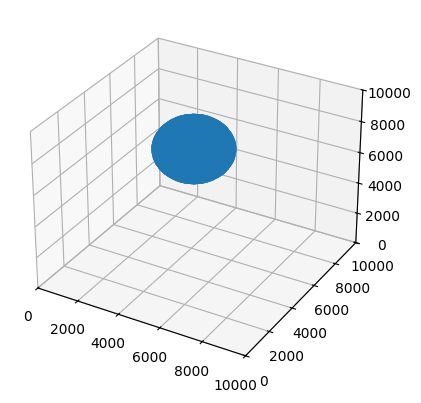

In [4]:
sphere= Random_Spheres.rand_tall_med_r(1,0,10000,5)
x,y,z =Plot_Sphere.plot_sphere(sphere)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)
ax.plot(x,y,z,'.')
plt.show()

Task 3 This function checks if the generated point is inside a sphere, it is the special case of the function in task 4 where we are only working with a single point, hence if the sphere is inside 100 will be printed, if the point is outside 0 will be printed

In [5]:
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)
print(point_in/points)

0.0


Task 4, this case is the general case where we are working with multiple points. Each point is checked by the function and the fraction inside vs outside is printed, and if the number of points is large enough, the share of points randomly placed inside the spheres divided by the total number of points should approximate the same volume % as the volume of the spheres divided by the volume of the box. Because we know the volume of the box and the volume of the spheres we can just use that to see if our monte-carlo simulation is approximating the known volume.

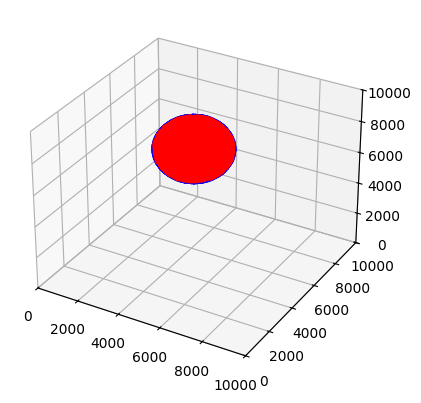

Volume calculated : 19649656839.08597
19698
1.9649656839 % chance in theory
19698 / 1000000 = 1.9698 % chance through testing


In [6]:
points = 1000000
point = Point_Maker.make_points(points,0,10000)
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()
print(f"Volume calculated : {volum[0]}")
print(point_in)
print(round((volum[0]/(10000**3))*100, 10),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')


Task 5. 
The volume of Pi is calculated from volume = (4/3) * pi * r ** 3.
we can reverse this function to get:
pi = volume/((4/3) * r ** 3)
The code corresponds to this function, also accounting for the fact that this function can take in multiple spheres and calculate pi from all of them.

In [7]:


print(Calculate_pi.pi_cal(sphere,point_in))

[np.float64(3.149321771732799)]


Task 6. In this task we use the same function as in task 2, except we specify to the function that we want 10 spheres.

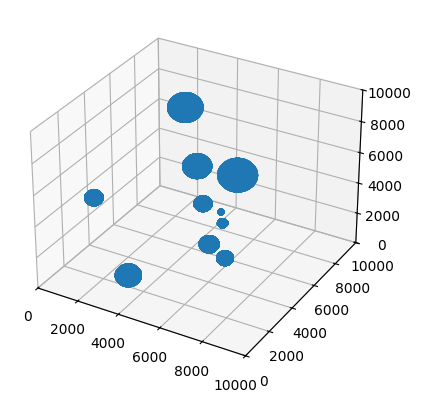

In [8]:

sphere= Random_Spheres.rand_tall_med_r(10,0,10000,10)
x,y,z =Plot_Sphere.plot_sphere(sphere)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)
ax.plot(x,y,z,'.')
plt.show()


Task 7. This function is explained in task 4, except that we are working with multiple spheres, which just means that the new volume of spheres is the volume of all spheres instead of a single sphere.

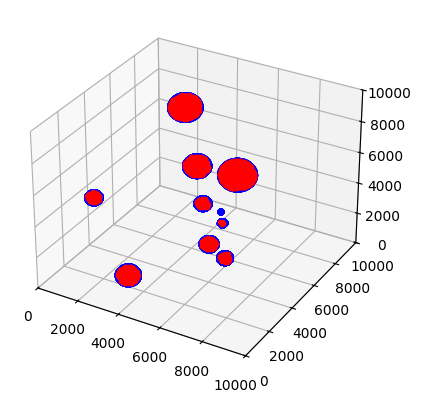

0.429876 % chance in theory
4305 / 1000000 = 0.4305 % chance through testing
Volume calculated : 0.4298757526
Points inside: 4305


In [9]:
points = 1000000
point = Point_Maker.make_points(points,0,10000)
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(sphere)):
    volume_total += round((volum[i]/(10000**3))*100, 10)
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')
print(f"Volume calculated : {volume_total}")
print(f"Points inside: {point_in}")

Task 8. The get dim and size of atom function reads the data from the dna_coords.txt and from it it reads the data. the values are stored in memory for the next task. Feel free to add a print statement if you want to see the results. Each atom has a size retrieved from the periodic table and is placed in its own corresponding list.

In [10]:
H,O,P,C,N,DnA = Size_of_atom.Get_dim_and_size_of_atom()#Feel free to add your own print statement, it is just not that pretty :)

Task 9. We the task_9 function will plot the DnA, we have changed the box to accommodate this slice of DnA. 

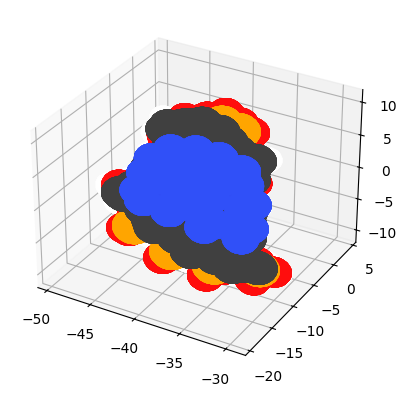

In [11]:
Task_9.task_9(H,O,P,C,N)

Task 10 Here we calculate the volume of the DnA by checking with 1 million points. and dividing this by the volume of the box to get the correct volume.
We can verify that this is correct by calculating the volume from the sizes of the atoms and their size in dna_coords.txt file in order to get the theoretical volume. 
Our problem is becuase of the low chance of particles hitting the DnA,the answer is correct but inaccurate

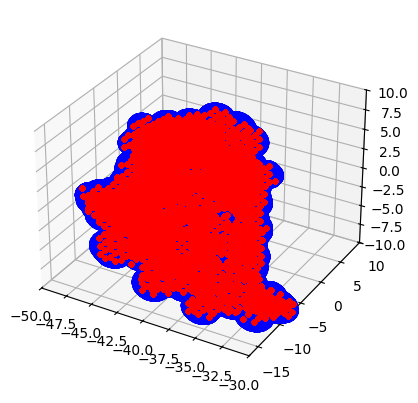

367.227687 % chance in theory
157168 / 1000000 = 15.716800000000001 % chance through testing
Points inside: 157168


In [12]:
points = 1000000
point_x = Point_Maker.make_points(points,-50,-30)
point_y = Point_Maker.make_points(points,-17,10)
point_z = Point_Maker.make_points(points,-10,10)
point = np.array([point_x[:, 0], point_y[:, 0], point_z[:, 0]]).T
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(DnA,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(DnA)



ax = fig.add_subplot(projection="3d")
ax.set_xlim(-50,-30)
ax.set_ylim(-17,10)
ax.set_zlim(-10,10)
x,y,z =Plot_Sphere.plot_sphere(DnA)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(DnA)):
    volume_total += round((volum[i]/(10**3))*100, 10)
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')

print(f"Points inside: {point_in}")

***Topic 2***
Task  1 and 2

In [13]:
Walkers_Task_1.main(30,30)

---------------------
low lim hit
True -50.372 x < -50
False -9.2775 y < -20
False 8.318000000000001 z < -10
---------------------
---------------------
low lim hit
True -50.546 x < -50
False 2.7474999999999987 y < -20
False 2.3599999999999994 z < -10
---------------------
---------------------
Dette er high lim hit
True -29.171999999999997 x > -30
False -8.515 y > 5
False -7.937999999999999 z > 10
---------------------
---------------------
Dette er high lim hit
True -29.556 x > -30
False -4.1899999999999995 y > 5
False 1.3939999999999984 z > 10
---------------------
---------------------
Dette er high lim hit
False -48.354 x > -30
True 5.484999999999999 y > 5
False 0.02800000000000047 z > 10
---------------------
---------------------
low lim hit
False -38.95 x < -50
True -20.33 y < -20
False 9.684000000000001 z < -10
---------------------
---------------------
low lim hit
True -50.494 x < -50
False 2.2575000000000003 y < -20
False -0.48400000000000176 z < -10
---------------------
-

Task 3


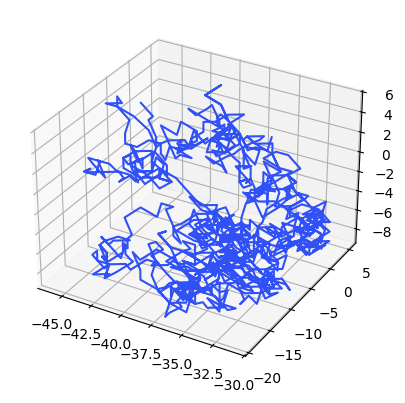

Number of points inside DNA: 51579
Total points tested: 272677
Bounding box volume: 10000
Inside fraction:     0.189158
DNA volume ≈ 1891.5786810035318


In [14]:
Calculate_the_volume_of_DNA.main(300,1000)

Task 4: The strategy to answer that task 3 is correct is by dividing the volume of the box by the known value of the dna. if that corresponds to the share of the number of points within divided by the number of points outside the dna, then we know the volume is correct

task 5: See task 3


Statement on the use of Ai

Audun: I did not use Ai for this lab

Christoffer: Jeg har ikke brukt ai for denne oppgaven

Markus: Jeg har ikke brukt ai for denne oppgaven

Individual contributions

Audun: I refactored the code into sepparate functions in sepparate files. I wrote the main projectfile and the first draft. I was helping with consultation on the code being written. I also wrote the code behind the box and the initial code for the spheres. I also ran pylint and handled the assembly of the jupyter notebook

Christoffer: Jeg har kodet og designet de fleste funsjonene i task1 og vær med på å planlegge hvordan vi skulle løse task 1 og 2

Markus: Jeg har vært med på å kode oppgavene og planlagt hvordan vi skulle løse de forskjellige oppgavene. Jeg kodet de fleste i del 2



Bonus rating printout from pylint:

audun@Linuxbro:~/Pythontestinggrounds/mod300/Sammarbeid_oppg3/Mod300/Project3-mod300-main$ pylint --recursive=y .
************* Module Circletest
Circletest.py:13:0: C0301: Line too long (113/100) (line-too-long)
Circletest.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Circletest.py:1:0: C0103: Module name "Circletest" doesn't conform to snake_case naming style (invalid-name)
************* Module Random_walker
Random_walker.py:22:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:32:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:41:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:56:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:61:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:63:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:68:0: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:69:48: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:78:25: C0303: Trailing whitespace (trailing-whitespace)
Random_walker.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Random_walker.py:1:0: C0103: Module name "Random_walker" doesn't conform to snake_case naming style (invalid-name)
Random_walker.py:2:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
Random_walker.py:5:0: W0404: Reimport 'numpy' (imported line 3) (reimported)
Random_walker.py:11:0: C0116: Missing function or method docstring (missing-function-docstring)
Random_walker.py:17:0: C0116: Missing function or method docstring (missing-function-docstring)
Random_walker.py:17:18: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
Random_walker.py:27:8: W0612: Unused variable 'step' (unused-variable)
Random_walker.py:67:0: C0116: Missing function or method docstring (missing-function-docstring)
Random_walker.py:72:8: W0612: Unused variable 'walk_index' (unused-variable)
Random_walker.py:5:0: C0411: third party import "import numpy as np" should be placed before "from Point_Maker import make_points" (wrong-import-order)
Random_walker.py:5:0: C0412: Imports from package numpy are not grouped (ungrouped-imports)
Random_walker.py:1:0: W0611: Unused import random (unused-import)
************* Module Make_box
Make_box.py:11:0: C0304: Final newline missing (missing-final-newline)
Make_box.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Make_box.py:1:0: C0103: Module name "Make_box" doesn't conform to snake_case naming style (invalid-name)
Make_box.py:1:0: C0103: Function name "Box_Maker" doesn't conform to snake_case naming style (invalid-name)
Make_box.py:8:4: E0602: Undefined variable 'ax' (undefined-variable)
Make_box.py:9:4: E0602: Undefined variable 'ax' (undefined-variable)
Make_box.py:10:4: E0602: Undefined variable 'ax' (undefined-variable)
************* Module Plot_Sphere
Plot_Sphere.py:23:0: C0304: Final newline missing (missing-final-newline)
Plot_Sphere.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Plot_Sphere.py:1:0: C0103: Module name "Plot_Sphere" doesn't conform to snake_case naming style (invalid-name)
************* Module Size_of_atom
Size_of_atom.py:83:0: C0301: Line too long (150/100) (line-too-long)
Size_of_atom.py:84:0: C0305: Trailing newlines (trailing-newlines)
Size_of_atom.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Size_of_atom.py:1:0: C0103: Module name "Size_of_atom" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:2:0: C0103: Function name "Get_dim_and_size_of_atom" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:19:4: C0103: Variable name "return_list_H" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:20:4: C0103: Variable name "return_list_O" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:21:4: C0103: Variable name "return_list_P" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:22:4: C0103: Variable name "return_list_C" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:23:4: C0103: Variable name "return_list_N" doesn't conform to snake_case naming style (invalid-name)
Size_of_atom.py:80:11: W0718: Catching too general exception Exception (broad-exception-caught)
Size_of_atom.py:33:13: W1514: Using open without explicitly specifying an encoding (unspecified-encoding)
Size_of_atom.py:2:0: R0912: Too many branches (18/12) (too-many-branches)
************* Module Volume_Of_Spheres
Volume_Of_Spheres.py:6:0: C0304: Final newline missing (missing-final-newline)
Volume_Of_Spheres.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Volume_Of_Spheres.py:1:0: C0103: Module name "Volume_Of_Spheres" doesn't conform to snake_case naming style (invalid-name)
Volume_Of_Spheres.py:2:0: C0116: Missing function or method docstring (missing-function-docstring)
************* Module Calculate_sphere
Calculate_sphere.py:20:0: C0304: Final newline missing (missing-final-newline)
Calculate_sphere.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Calculate_sphere.py:1:0: C0103: Module name "Calculate_sphere" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:4:0: C0103: Function name "Calculate_sphere" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:9:4: C0103: Variable name "H" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:9:7: C0103: Variable name "C" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:9:10: C0103: Variable name "N" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:9:13: C0103: Variable name "O" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:9:16: C0103: Variable name "P" doesn't conform to snake_case naming style (invalid-name)
Calculate_sphere.py:2:0: C0411: third party import "import numpy as np" should be placed before "from Size_of_atom import Get_dim_and_size_of_atom" (wrong-import-order)
************* Module Walkers_Task_1
Walkers_Task_1.py:39:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:68:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:70:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:81:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:82:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:86:0: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:88:21: C0303: Trailing whitespace (trailing-whitespace)
Walkers_Task_1.py:106:0: C0304: Final newline missing (missing-final-newline)
Walkers_Task_1.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Walkers_Task_1.py:1:0: C0103: Module name "Walkers_Task_1" doesn't conform to snake_case naming style (invalid-name)
Walkers_Task_1.py:2:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
Walkers_Task_1.py:5:0: W0404: Reimport 'numpy' (imported line 3) (reimported)
Walkers_Task_1.py:27:0: C0116: Missing function or method docstring (missing-function-docstring)
Walkers_Task_1.py:27:25: W0621: Redefining name 'xyz_high' from outer scope (line 25) (redefined-outer-name)
Walkers_Task_1.py:27:35: W0621: Redefining name 'xyz_low' from outer scope (line 24) (redefined-outer-name)
Walkers_Task_1.py:34:0: C0116: Missing function or method docstring (missing-function-docstring)
Walkers_Task_1.py:34:18: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
Walkers_Task_1.py:44:12: W0612: Unused variable 'step' (unused-variable)
Walkers_Task_1.py:97:0: C0103: Constant name "user_input_1" doesn't conform to UPPER_CASE naming style (invalid-name)
Walkers_Task_1.py:98:0: C0103: Constant name "user_input_2" doesn't conform to UPPER_CASE naming style (invalid-name)
Walkers_Task_1.py:99:0: C0116: Missing function or method docstring (missing-function-docstring)
Walkers_Task_1.py:99:9: W0621: Redefining name 'user_input_1' from outer scope (line 97) (redefined-outer-name)
Walkers_Task_1.py:99:22: W0621: Redefining name 'user_input_2' from outer scope (line 98) (redefined-outer-name)
Walkers_Task_1.py:1:0: W0611: Unused import random (unused-import)
************* Module test
test.py:20:0: C0303: Trailing whitespace (trailing-whitespace)
test.py:21:0: C0303: Trailing whitespace (trailing-whitespace)
test.py:23:48: C0303: Trailing whitespace (trailing-whitespace)
test.py:33:27: C0303: Trailing whitespace (trailing-whitespace)
test.py:40:0: C0303: Trailing whitespace (trailing-whitespace)
test.py:44:0: C0305: Trailing newlines (trailing-newlines)
test.py:1:0: C0114: Missing module docstring (missing-module-docstring)
test.py:2:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
test.py:7:0: W0404: Reimport 'numpy' (imported line 3) (reimported)
test.py:14:0: C0116: Missing function or method docstring (missing-function-docstring)
test.py:16:4: W0612: Unused variable 'atoms' (unused-variable)
test.py:18:4: W0612: Unused variable 'xyz_low' (unused-variable)
test.py:19:4: W0612: Unused variable 'xyz_high' (unused-variable)
test.py:23:4: W0612: Unused variable 'ax' (unused-variable)
test.py:26:8: W0612: Unused variable 'walk_index' (unused-variable)
test.py:7:0: C0411: third party import "import numpy as np" should be placed before "import Circletest" (wrong-import-order)
test.py:7:0: C0412: Imports from package numpy are not grouped (ungrouped-imports)
test.py:1:0: W0611: Unused import random (unused-import)
test.py:4:0: W0611: Unused import Circletest (unused-import)
test.py:5:0: W0611: Unused import Point_In_Spheres (unused-import)
test.py:6:0: W0611: Unused plot_sphere imported from Plot_Sphere (unused-import)
************* Module Calculate_pi
Calculate_pi.py:6:0: C0304: Final newline missing (missing-final-newline)
Calculate_pi.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Calculate_pi.py:1:0: C0103: Module name "Calculate_pi" doesn't conform to snake_case naming style (invalid-name)
Calculate_pi.py:1:0: C0116: Missing function or method docstring (missing-function-docstring)
************* Module remake_points
remake_points.py:1:0: C0114: Missing module docstring (missing-module-docstring)
remake_points.py:5:0: C0116: Missing function or method docstring (missing-function-docstring)
remake_points.py:5:25: W0621: Redefining name 'xyz_high' from outer scope (line 3) (redefined-outer-name)
remake_points.py:5:35: W0621: Redefining name 'xyz_low' from outer scope (line 2) (redefined-outer-name)
************* Module Random_Spheres
Random_Spheres.py:12:0: C0301: Line too long (104/100) (line-too-long)
Random_Spheres.py:25:0: C0304: Final newline missing (missing-final-newline)
Random_Spheres.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Random_Spheres.py:1:0: C0103: Module name "Random_Spheres" doesn't conform to snake_case naming style (invalid-name)
************* Module backup
backup.py:53:0: C0303: Trailing whitespace (trailing-whitespace)
backup.py:68:0: C0303: Trailing whitespace (trailing-whitespace)
backup.py:73:0: C0303: Trailing whitespace (trailing-whitespace)
backup.py:75:0: C0303: Trailing whitespace (trailing-whitespace)
backup.py:80:0: C0303: Trailing whitespace (trailing-whitespace)
backup.py:89:25: C0303: Trailing whitespace (trailing-whitespace)
backup.py:1:0: C0114: Missing module docstring (missing-module-docstring)
backup.py:2:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
backup.py:5:0: W0404: Reimport 'numpy' (imported line 3) (reimported)
backup.py:27:0: C0116: Missing function or method docstring (missing-function-docstring)
backup.py:27:25: W0621: Redefining name 'xyz_high' from outer scope (line 25) (redefined-outer-name)
backup.py:27:35: W0621: Redefining name 'xyz_low' from outer scope (line 24) (redefined-outer-name)
backup.py:34:0: C0116: Missing function or method docstring (missing-function-docstring)
backup.py:34:18: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
backup.py:40:8: W0612: Unused variable 'step' (unused-variable)
backup.py:79:0: C0116: Missing function or method docstring (missing-function-docstring)
backup.py:83:8: W0612: Unused variable 'walk_index' (unused-variable)
backup.py:1:0: W0611: Unused import random (unused-import)
************* Module Task_9
Task_9.py:33:0: C0304: Final newline missing (missing-final-newline)
Task_9.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Task_9.py:1:0: C0103: Module name "Task_9" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:1:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
Task_9.py:6:0: C0116: Missing function or method docstring (missing-function-docstring)
Task_9.py:6:11: C0103: Argument name "H" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:6:13: C0103: Argument name "O" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:6:15: C0103: Argument name "P" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:6:17: C0103: Argument name "C" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:6:19: C0103: Argument name "N" doesn't conform to snake_case naming style (invalid-name)
Task_9.py:6:0: R0914: Too many local variables (22/15) (too-many-locals)
Task_9.py:17:4: W0104: Statement seems to have no effect (pointless-statement)
Task_9.py:3:0: W0611: Unused import Size_of_atom (unused-import)
************* Module Point_Maker
Point_Maker.py:18:0: C0304: Final newline missing (missing-final-newline)
Point_Maker.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Point_Maker.py:1:0: C0103: Module name "Point_Maker" doesn't conform to snake_case naming style (invalid-name)
************* Module Point_In_Spheres
Point_In_Spheres.py:19:0: C0305: Trailing newlines (trailing-newlines)
Point_In_Spheres.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Point_In_Spheres.py:1:0: C0103: Module name "Point_In_Spheres" doesn't conform to snake_case naming style (invalid-name)
Point_In_Spheres.py:4:0: C0116: Missing function or method docstring (missing-function-docstring)
Point_In_Spheres.py:4:0: C0103: Function name "Point_In_Spheres" doesn't conform to snake_case naming style (invalid-name)
Point_In_Spheres.py:1:0: W0611: Unused numpy imported as np (unused-import)
************* Module Calculate_the_volume_of_DNA
Calculate_the_volume_of_DNA.py:52:0: C0303: Trailing whitespace (trailing-whitespace)
Calculate_the_volume_of_DNA.py:60:0: C0303: Trailing whitespace (trailing-whitespace)
Calculate_the_volume_of_DNA.py:64:0: C0303: Trailing whitespace (trailing-whitespace)
Calculate_the_volume_of_DNA.py:70:0: C0305: Trailing newlines (trailing-newlines)
Calculate_the_volume_of_DNA.py:1:0: C0114: Missing module docstring (missing-module-docstring)
Calculate_the_volume_of_DNA.py:1:0: C0103: Module name "Calculate_the_volume_of_DNA" doesn't conform to snake_case naming style (invalid-name)
Calculate_the_volume_of_DNA.py:3:0: E0401: Unable to import 'matplotlib.pyplot' (import-error)
Calculate_the_volume_of_DNA.py:10:0: C0103: Function name "Calculate_the_volume_of_DNA" doesn't conform to snake_case naming style (invalid-name)
Calculate_the_volume_of_DNA.py:10:0: R0914: Too many local variables (17/15) (too-many-locals)
Calculate_the_volume_of_DNA.py:31:8: C0200: Consider using enumerate instead of iterating with range and len (consider-using-enumerate)
Calculate_the_volume_of_DNA.py:42:4: C0103: Variable name "Volume_of_box" doesn't conform to snake_case naming style (invalid-name)
Calculate_the_volume_of_DNA.py:43:4: C0103: Variable name "Volume_of_DnA" doesn't conform to snake_case naming style (invalid-name)
Calculate_the_volume_of_DNA.py:26:8: W0612: Unused variable 'walk_index' (unused-variable)
Calculate_the_volume_of_DNA.py:67:0: C0116: Missing function or method docstring (missing-function-docstring)
Calculate_the_volume_of_DNA.py:3:0: C0411: third party import "import matplotlib.pyplot as plt" should be placed before "from Size_of_atom import Get_dim_and_size_of_atom" (wrong-import-order)
Calculate_the_volume_of_DNA.py:7:0: C0411: standard import "import math" should be placed before "import numpy as np" (wrong-import-order)
Calculate_the_volume_of_DNA.py:2:0: W0611: Unused Get_dim_and_size_of_atom imported from Size_of_atom (unused-import)
Calculate_the_volume_of_DNA.py:7:0: W0611: Unused import math (unused-import)
Calculate_the_volume_of_DNA.py:8:0: W0611: Unused task_9 imported from Task_9 (unused-import)
Calculate_the_volume_of_DNA.py:1:0: R0801: Similar lines in 2 files
==Random_walker:[20:68]
==backup:[34:80]
    distribute = re_make_point(make_points(1,1,10000),xyz_high,xyz_low)
    x=distribute[0][0]
    y=distribute[0][1]
    z=distribute[0][2]

    for step in range(N):
        x=np.append(x,np.random.randint(-1,2))
        y=np.append(y,np.random.randint(-1,2))
        z=np.append(z,np.random.randint(-1,2))

        if sum(x) > xyz_high[0] or sum(y) > xyz_high[1] or sum(z) > xyz_high[2]:
            # if __name__ == "__main__":
            #     print("---------------------")
            #     print("Dette er high lim hit")
            #     print(sum(x) > xyz_high[0],sum(x),'x >',xyz_high[0])
            #     print(sum(y) > xyz_high[1],sum(y),'y >',xyz_high[1])
            #     print(sum(z) > xyz_high[2],sum(z),'z >',xyz_high[2])
            #     print("---------------------")


            x = x[:-1]
            y = y[:-1]
            z = z[:-1]
            continue

        if sum(x) < xyz_low[0] or sum(y) < xyz_low[1] or sum(z) < xyz_low[2]:
            # if __name__ == "__main__":
            #     # print("---------------------")
            #     # print("low lim hit")
            #     # print(sum(x) < xyz_low[0],sum(x),'x <',xyz_low[0])
            #     # print(sum(y) < xyz_low[1],sum(y),'y <',xyz_low[1])
            #     # print(sum(z) < xyz_low[2],sum(z),'z <',xyz_low[2])
            #     # print("---------------------")

            x = x[:-1]
            y = y[:-1]
            z = z[:-1]
            continue

    return np.array([np.cumsum(x), np.cumsum(y), np.cumsum(z)]).T




def main():
 (duplicate-code)
Calculate_the_volume_of_DNA.py:1:0: R0801: Similar lines in 2 files
==Random_walker:[71:83]
==backup:[82:94]
    for walk_index in range(walks):
        print_walk=random_walker(steps)
        ax.plot(*print_walk.T)
        plt.pause(0.05)

    ax.set_xlim([-50, -30])
    ax.set_ylim([-20, 5])
    ax.set_zlim([-10, 10])
    plt.show()

if __name__ == "__main__":
    main() (duplicate-code)
Calculate_the_volume_of_DNA.py:1:0: R0801: Similar lines in 2 files
==Walkers_Task_1:[17:34]
==backup:[17:34]
    x = np.random.uniform(low, high, numb_1)
    y = np.random.uniform(low, high, numb_1)
    z = np.random.uniform(low, high, numb_1)

    return np.round(np.array([x,y,z]).T)

xyz_low = np.array([-50, -20 , -10])
xyz_high = np.array([-30, 5 , 10])

def re_make_point(point, xyz_high, xyz_low, max_val=10000):
    # Vectorized mapping
    return xyz_low + (xyz_high - xyz_low) * (point / max_val)

ax=plt.figure().add_subplot(projection="3d")


def random_walker(N): (duplicate-code)
Calculate_the_volume_of_DNA.py:1:0: R0801: Similar lines in 2 files
==Random_walker:[22:42]
==Walkers_Task_1:[39:49]
        x=distribute[0][0]
        y=distribute[0][1]
        z=distribute[0][2]

        for step in range(N):
            x=np.append(x,np.random.randint(-1,2))
            y=np.append(y,np.random.randint(-1,2))
            z=np.append(z,np.random.randint(-1,2))

            if sum(x) > xyz_high[0] or sum(y) > xyz_high[1] or sum(z) > xyz_high[2]: (duplicate-code)

------------------------------------------------------------------
Your code has been rated at 3.98/10 (previous run: 3.98/10, +0.00)

audun@Linuxbro:~/Pythontestinggrounds/mod300/Sammarbeid_oppg3/Mod300/Project3-mod300-main$ 
